<a href="https://colab.research.google.com/github/MAU143429/IA-Laboratorios/blob/Forward/Lab_RedNeuronal_Modificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Autora: Adriana Álvarez F. 
# Since Collab is being used, it is necessary to install Pytorch
import torch as torch

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [3]:
def sigmoidalActivationFunction(x):
  return (1/(1+(torch.exp(-x))))


In [10]:
def forward(weights,featuresT):
  result=weights.mm(featuresT)
  return sigmoidalActivationFunction(result)


In [5]:
def countRows(matrix):
  return matrix.size()[0]

In [6]:
def countColumns(matrix):
  return matrix.size()[1]

In [7]:
# Crea una matriz de tamano countHiddenLayer (rows) x countFeatures (columns) 
def randomWeights(rows, colums):
  return (torch.rand(rows, colums))


In [11]:
x = torch.tensor([[0.05, 0.01], [0.02, 0.5], [2,4]])
rows=countRows(x) # corresponde a la cantidad de observaciones del dataset, es decir, a la cantidad de observaciones
columns=countColumns(x) #corresponde a la cantidad de features del dataset
countNeuronsHiddenLayer1=1
weights=randomWeights(countNeuronsHiddenLayer1, columns)
#print(weights)
featuresT=x.transpose(0,1)
#print(featuresT)
r = forward(weights,featuresT)
print(r)


tensor([[0.5082, 0.6083, 0.9881]])


# Lab – Red neuronal Forward


*   Mauricio Calderon
*   Mario Araya


### 1. Explique que significa el resultado que se imprime en r.


R/ El resultado en forma de vector que vemos al imprimir "r" es el vector que posee los valores de los output1 para la cada una de las observaciones despues de pasar por la neurona presenta en la capa oculta 1.


### 2. Explique el resultado si agrega una observación adicional al dataset. Debe mostrar el dataset
modificado.



R/ Como podemos observar en la parte inferior, si agregamos una observación adicional al dataset y aplicamos los mismos procedimiento podemos ver como r imprime un vector de 4 resultados.

Lo que sucede acá es que, al agregar una observación adicional el algoritmo debe analizarla como una más, esto origina que el resultado tambien deba incluir un output1 para la 4 observación. 

Este procedimiento es iterativo, por lo que la cantidad de datos de salida del vector r corresponde a la cantidad n de observaciones presentes en el dataset.

In [14]:
'''
Ejemplo con Dataset modificado agregando una observacion adicional

'''

x = torch.tensor([[0.05, 0.01], [0.02, 0.5], [2,4],[1,5]])
rows=countRows(x) # corresponde a la cantidad de observaciones del dataset, es decir, a la cantidad de observaciones
columns=countColumns(x) #corresponde a la cantidad de features del dataset
countNeuronsHiddenLayer1=1
weights=randomWeights(countNeuronsHiddenLayer1, columns)
print("Pesos",weights)
featuresT=x.transpose(0,1)
print("Caracteristicas Transpuesta",featuresT)
r = forward(weights,featuresT)
print("R",r)


Pesos tensor([[0.8449, 0.8420]])
Caracteristicas Transpuesta tensor([[0.0500, 0.0200, 2.0000, 1.0000],
        [0.0100, 0.5000, 4.0000, 5.0000]])
R tensor([[0.5127, 0.6078, 0.9937, 0.9937]])


### 3. Explique el resultado si agrega una característica adicional al dataset. Debe mostrar el dataset
modificado.

R/ Como podemos observar en la parte inferior, si agregamos un feature más dentro de cada una de las observaciones, vemos que si imprimimos el vector ¨r¨, la cantidad de valores son los mismos pero los resultados si cambiaron, esto se debe a que al incluir una feature adicional, esto lleva consigo el calculo de un nuevo peso asociado a ese feature para cada una de las observaciones, por lo que cuando se realiza las operaciones entre matrices este nuevo valor de peso debido a la adición del nuevo feature provoca que el valor de los outputs1 (salida de la neurona) se vea modificado respecto al dataset original.

In [16]:
'''
Ejemplo con Dataset modificado agregando una caracteristica adicional

'''

x = torch.tensor([[0.05, 0.01, 0.07], [0.02, 0.5, 0.03], [2,4,1]])
rows=countRows(x) # corresponde a la cantidad de observaciones del dataset, es decir, a la cantidad de observaciones
columns=countColumns(x) #corresponde a la cantidad de features del dataset
countNeuronsHiddenLayer1=1
weights=randomWeights(countNeuronsHiddenLayer1, columns)
print("Pesos",weights)
featuresT=x.transpose(0,1)
print("Caracteristicas Transpuesta",featuresT)
r = forward(weights,featuresT)
print("R",r)


Pesos tensor([[0.4053, 0.6263, 0.9073]])
Caracteristicas Transpuesta tensor([[0.0500, 0.0200, 2.0000],
        [0.0100, 0.5000, 4.0000],
        [0.0700, 0.0300, 1.0000]])
R tensor([[0.5225, 0.5862, 0.9856]])


### 4. Modifique el código para agregar una nueva neurona a la capa oculta 1. Incluya un dibujo de la
red.

R/ Primeramente representando gráficamente la red neuronal inicial tendriamos lo siguiente:

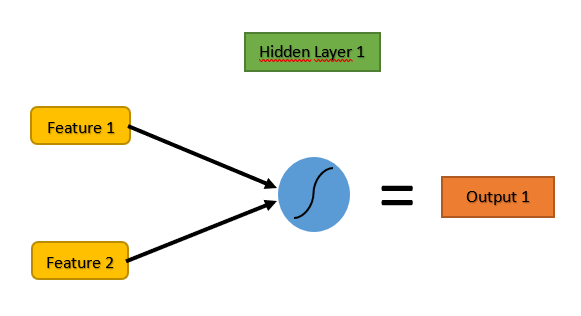


Incluyendo la modificación indicada, la  red neuronal nos quedaría de la siguiente manera:

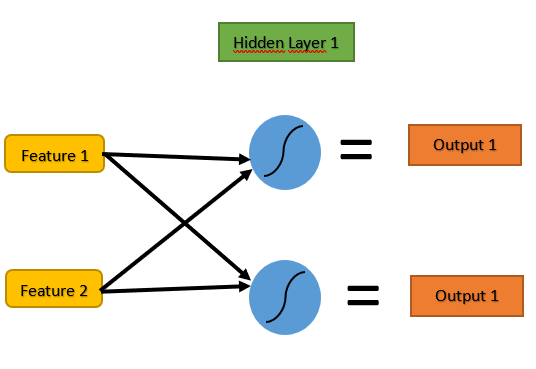

Las modificaciones del código se muestran en la parte inferior.

Como podemos observar a diferencia de los puntos anteriores, el vector ¨r¨ ahora aumento una dimension más, esto ocurre de esta manera debido a que al aumentar en 1 neurona la capa oculta 1, esto ocasiona que tengamos output1 tanto para la primer neurona como para la segunda, duplicando las salidas del vector. 

En este caso las el primer vector de ¨r¨ representa los 3 outputs para las 3 observaciones de la primer neurona y el segundo vector representa los 3 outputs para las 3 observacioens de la segunda neurona. Tal y como se muestra abajo.

In [19]:
'''
Se agrega una neurona extra a la capa oculta 1

'''

x = torch.tensor([[0.05, 0.01], [0.02, 0.5], [2,4]])
rows=countRows(x) # corresponde a la cantidad de observaciones del dataset, es decir, a la cantidad de observaciones
columns=countColumns(x) #corresponde a la cantidad de features del dataset
countNeuronsHiddenLayer1=2
weights=randomWeights(countNeuronsHiddenLayer1, columns)
print("Pesos",weights)
featuresT=x.transpose(0,1)
print("Caracteristicas Transpuesta",featuresT)
r = forward(weights,featuresT)
print("R",r)


Pesos tensor([[0.7059, 0.3361],
        [0.1018, 0.5998]])
Caracteristicas Transpuesta tensor([[0.0500, 0.0200, 2.0000],
        [0.0100, 0.5000, 4.0000]])
R tensor([[0.5097, 0.5454, 0.9403],
        [0.5028, 0.5749, 0.9311]])


### 5. Modifique el código para agregar la programación del bias.

### 6. Sobre el punto anterior, modifique el código para agregar una nueva capa oculta 2 con 1
neurona. Incluya un dibujo de la red.

### 7. Sobre el punto anterior, modifique el código para agregar una nueva neurona a la capa oculta 2.
Incluya un dibujo de la red.

### 8. Programe la red neuronal del punto anterior sin utilizar métodos ya preexistentes, es decir,
programe todo el algoritmo (sólo el forward). Debe usar operaciones con matrices y un mínimo
de fors. Prográmelo de forma que sea parametrizable en la cantidad de observaciones y de
features.

### 9. Agregue el target y la programación de la función de error para el primer forward.